## Обзор данных

In [1]:
import pandas

import matplotlib.pyplot as plt
%matplotlib inline

features=pandas.read_csv('features/features.csv', index_col='match_id')

features.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier" 
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier" 
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля


Удалите признаки, связанные с итогами матча:
- `duration`: длительность
- `radiant_win`: 1, если победила команда Radiant, 0 — иначе
- Состояние башен и барраков к концу матча (см. описание полей набора данных)
    - `tower_status_radiant`
    - `tower_status_dire`
    - `barracks_status_radiant`
    - `barracks_status_dire`

In [2]:
df=features.drop(['duration','radiant_win','tower_status_radiant','tower_status_dire',\
                  'barracks_status_radiant','barracks_status_dire'], axis=1)

Проверьте выборку на наличие пропусков с помощью функции count(), которая для каждого столбца показывает число заполненных значений. Много ли пропусков в данных? Запишите названия признаков, имеющих пропуски, и попробуйте для любых двух из них дать обоснование, почему их значения могут быть пропущены.

In [3]:
rows=len(df)
feature_count = pandas.DataFrame(df.count(), columns=['num'])
feature_count = feature_count[feature_count['num'] < rows]
feature_count.sort_values(by=['num'], ascending=False)

,num
dire_courier_time,96554
radiant_courier_time,96538
dire_first_ward_time,95404
radiant_first_ward_time,95394
radiant_bottle_time,81539
dire_bottle_time,81087
first_blood_time,77677
first_blood_team,77677
first_blood_player1,77677
dire_flying_courier_time,71132


- first_blood_time - время первого убийства 
- first_blood_team - команда, совершившая первая убийство
- first_blood_player1 - игрок, совершивший первое убийство
- first_blood_player2 - кого убили первым 
- radiant_bottle_time - время приобритение командой radiant предмета bottle
- radiant_courier_time - время покупки командой radiant предмета courier
- radiant_flying_courier_time - время приобретения командой radiant предмета flying_courier
- radiant_first_ward_time - время установки командой radiant варда
- dire_bottle_time - время первого приобретения командой dire предмета bottle
- dire_courier_time - время покупки командой dire предмета courier
- dire_flying_courier_time - время приобретения командой dire предмета flying_courier
- dire_first_ward_time - время установки командой dire варда



Замените пропуски на нули с помощью функции fillna(). На самом деле этот способ является предпочтительным для логистической регрессии, поскольку он позволит пропущенному значению не вносить никакого вклада в предсказание. Для деревьев часто лучшим вариантом оказывается замена пропуска на очень большое или очень маленькое значение — в этом случае при построении разбиения вершины можно будет отправить объекты с пропусками в отдельную ветвь дерева. Также есть и другие подходы — например, замена пропуска на среднее значение признака. Мы не требуем этого в задании, но при желании попробуйте разные подходы к обработке пропусков и сравните их между собой.

In [4]:
df.fillna(0,inplace=True)

Какой столбец содержит целевую переменную? Запишите его название.

In [5]:
X_train=df
y_train=features['radiant_win'].to_frame()

### Подход 1: градиентный бустинг "в лоб"

Забудем, что в выборке есть категориальные признаки, и попробуем обучить градиентный бустинг над деревьями на имеющейся матрице "объекты-признаки". Зафиксируйте генератор разбиений для кросс-валидации по 5 блокам (KFold), не забудьте перемешать при этом выборку (shuffle=True), поскольку данные в таблице отсортированы по времени, и без перемешивания можно столкнуться с нежелательными эффектами при оценивании качества. Оцените качество градиентного бустинга (GradientBoostingClassifier) с помощью данной кросс-валидации, попробуйте при этом разное количество деревьев (как минимум протестируйте следующие значения для количества деревьев: 10, 20, 30). Долго ли настраивались классификаторы? Достигнут ли оптимум на испытанных значениях параметра n_estimators, или же качество, скорее всего, продолжит расти при дальнейшем его увеличении?

In [6]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

import numpy as np
import datetime

In [7]:
cv=KFold(n_splits=5,shuffle=True)

In [8]:
scores=list()
for i in range(10, 100, 10):
    model = GradientBoostingClassifier(n_estimators=i)
    start_time=datetime.datetime.now()
    scores.append(cross_val_score(model,X_train,y_train.values.ravel(),cv=cv,scoring='roc_auc'))
    print('Number trees: '+ str(i) + '. Time elapsed: '+ str(datetime.datetime.now() - start_time) + '. ROC-AUC mean = ', str(np.mean(scores)))


Number trees: 10. Time elapsed: 0:00:26.065295. ROC-AUC mean =  0.663469894604902
Number trees: 20. Time elapsed: 0:00:42.558146. ROC-AUC mean =  0.672688567691887
Number trees: 30. Time elapsed: 0:01:03.202030. ROC-AUC mean =  0.678405659184674
Number trees: 40. Time elapsed: 0:01:21.499678. ROC-AUC mean =  0.6822601456653257
Number trees: 50. Time elapsed: 0:01:40.903265. ROC-AUC mean =  0.6852533094120452
Number trees: 60. Time elapsed: 0:02:01.098960. ROC-AUC mean =  0.6877723563952179
Number trees: 70. Time elapsed: 0:02:20.781285. ROC-AUC mean =  0.689855951282856
Number trees: 80. Time elapsed: 0:02:40.076584. ROC-AUC mean =  0.6917406350694553
Number trees: 90. Time elapsed: 0:03:00.072748. ROC-AUC mean =  0.6931678914028679


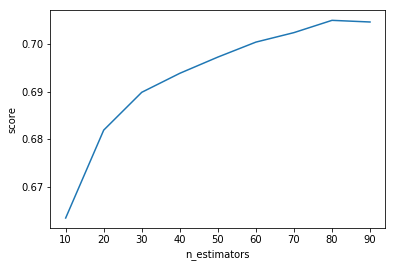

In [9]:
plt.plot(np.linspace(10,90,num=9),np.mean(scores,axis = 1))
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:01:26. Показатель метрики качества AUC-ROC в таком случае равен 0.678.

Имеет смысл использовать больше 30 деревьев, так как с увелечением количества деревьев увеличиваются значения метрики AUC-ROC. Для достижения большего качества имеет смысл использовать более 30 деревьев. 
Если все работает очень медлено:
- Используйте для обучения и кросс-валидации не всю выборку, а некоторое ее подмножество — например, половину объектов. Подмножество лучше всего брать случайным, а не формировать его из первых m объектов.
- Попробуйте упростить модель — например, уменьшить глубину деревьев в градиентом бустинге (max_depth).


## Подход 2: логистическая регрессия

Линейные методы работают гораздо быстрее композиций деревьев, поэтому кажется разумным воспользоваться именно ими для ускорения анализа данных. Одним из наиболее распространенных методов для классификации является логистическая регрессия.

Важно: не забывайте, что линейные алгоритмы чувствительны к масштабу признаков! Может пригодиться sklearn.preprocessing.StandartScaler.

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
X_train=StandardScaler().fit_transform(X_train)

Оцените качество логистической регрессии (sklearn.linear_model.LogisticRegression с L2-регуляризацией) с помощью кросс-валидации по той же схеме, которая использовалась для градиентного бустинга. Подберите при этом лучший параметр регуляризации (C). Какое наилучшее качество у вас получилось? Как оно соотносится с качеством градиентного бустинга? Чем вы можете объяснить эту разницу? Быстрее ли работает логистическая регрессия по сравнению с градиентным бустингом?

In [12]:
from sklearn.linear_model import LogisticRegression
scores=list()

for c in [10 ** i for i in range(-3, 5)]:
    start_time=datetime.datetime.now()
    model=LogisticRegression(C=c)
    scores.append(cross_val_score(model,X_train,y_train.values.ravel(),cv=cv,scoring='roc_auc'))
    print('Param C: '+ str(c) + '. Time elapsed: '+ str(datetime.datetime.now() - start_time) + '. ROC-AUC mean = ', str(np.mean(scores)))


Param C: 0.001. Time elapsed: 0:00:08.103544. ROC-AUC mean =  0.7162547121974812
Param C: 0.01. Time elapsed: 0:00:11.337141. ROC-AUC mean =  0.7163363384195646
Param C: 0.1. Time elapsed: 0:00:12.336800. ROC-AUC mean =  0.7163637271391327
Param C: 1. Time elapsed: 0:00:12.356850. ROC-AUC mean =  0.7163708085989479
Param C: 10. Time elapsed: 0:00:12.151676. ROC-AUC mean =  0.7163422527298596
Param C: 100. Time elapsed: 0:00:12.076105. ROC-AUC mean =  0.7163682809006587
Param C: 1000. Time elapsed: 0:00:11.623904. ROC-AUC mean =  0.7163777140807674
Param C: 10000. Time elapsed: 0:00:11.730186. ROC-AUC mean =  0.7163936378148735


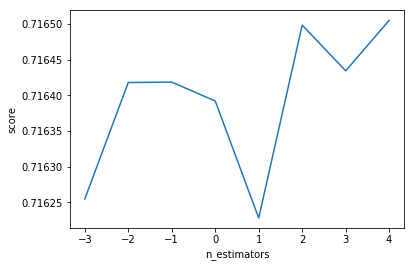

In [13]:
plt.plot([i for i in range(-3, 5)],np.mean(scores,axis = 1))
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

Лучшее значение метрики AUC-ROC = 0.7163936378148735 при C = 10000. Это выше чем при бустинге со 100 деревьями, к тому же, работает заметно быстрее.  

Среди признаков в выборке есть категориальные, которые мы использовали как числовые, что вряд ли является хорошей идеей. Категориальных признаков в этой задаче одиннадцать: lobby_type и r1_hero, r2_hero, ..., r5_hero, d1_hero, d2_hero, ..., d5_hero. Уберите их из выборки, и проведите кросс-валидацию для логистической регрессии на новой выборке с подбором лучшего параметра регуляризации. Изменилось ли качество? Чем вы можете это объяснить?

Удаляем категориальные фичи:

In [14]:
df.drop([
    'lobby_type',
    'r1_hero',
    'r2_hero',
    'r3_hero',
    'r4_hero',
    'r5_hero',
    'd1_hero',
    'd2_hero',
    'd3_hero',
    'd4_hero',
    'd5_hero',
],axis=1, inplace = True)

In [15]:
X_train=df
X_train=StandardScaler().fit_transform(X_train)

In [16]:
scores=list()

for c in [10 ** i for i in range(-3, 5)]:
    start_time=datetime.datetime.now()
    model=LogisticRegression(C=c)
    scores.append(cross_val_score(model,X_train,y_train.values.ravel(),cv=cv,scoring='roc_auc'))
    print('Param C: '+ str(c) + '. Time elapsed: '+ str(datetime.datetime.now() - start_time) + '. ROC-AUC mean = ', str(np.mean(scores)))


Param C: 0.001. Time elapsed: 0:00:07.783692. ROC-AUC mean =  0.7162282455932054
Param C: 0.01. Time elapsed: 0:00:09.845177. ROC-AUC mean =  0.7161745462076294
Param C: 0.1. Time elapsed: 0:00:10.605193. ROC-AUC mean =  0.7162617632501592
Param C: 1. Time elapsed: 0:00:10.794701. ROC-AUC mean =  0.7163219627835173
Param C: 10. Time elapsed: 0:00:10.958131. ROC-AUC mean =  0.7163222675514161
Param C: 100. Time elapsed: 0:00:11.011275. ROC-AUC mean =  0.7163781882999877
Param C: 1000. Time elapsed: 0:00:10.685410. ROC-AUC mean =  0.716402573685166
Param C: 10000. Time elapsed: 0:00:10.861877. ROC-AUC mean =  0.7164085227194648


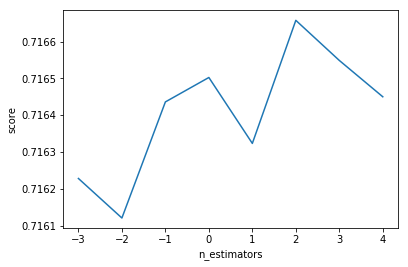

In [17]:
plt.plot([i for i in range(-3, 5)],np.mean(scores,axis = 1))
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

Наилучшее значение показателя AUC-ROC так же достигается при C = 10000 и равно 0.7164085227194648. Получается, что в предыдущей модели эти признаки никак не влияли на результат предсказания, модель смогла распознать этот шум.

На предыдущем шаге мы исключили из выборки признаки rM_hero и dM_hero, которые показывают, какие именно герои играли за каждую команду. Это важные признаки — герои имеют разные характеристики, и некоторые из них выигрывают чаще, чем другие. Выясните из данных, сколько различных идентификаторов героев существует в данной игре (вам может пригодиться фукнция unique или value_counts).

In [18]:
df = pandas.read_csv('data/features.csv',index_col='match_id')
df.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire',
         'radiant_win'
        ], axis=1,inplace=True)

df.fillna(0,inplace=True)

In [19]:
for col in df[['r1_hero', 'r2_hero', 'r3_hero', 'r4_hero','r5_hero', 
               'd1_hero', 'd2_hero', 'd3_hero', 'd4_hero', 'd5_hero']].columns:
    heroes_labels=len(df[col].unique())
    N = max(df[col])
    print(heroes_labels,' ', N)

108   112
108   112
108   112
108   112
108   112
108   112
108   112
108   112
108   112
108   112


Воспользуемся подходом "мешок слов" для кодирования информации о героях. Пусть всего в игре имеет N различных героев. Сформируем N признаков, при этом i-й будет равен нулю, если i-й герой не участвовал в матче; единице, если i-й герой играл за команду Radiant; минус единице, если i-й герой играл за команду Dire. Ниже вы можете найти код, который выполняет данной преобразование. Добавьте полученные признаки к числовым, которые вы использовали во втором пункте данного этапа.

In [20]:
X_pick=np.zeros((df.shape[0], N))

for i, match_id in enumerate(df.index):
    for p in range(5):
        X_pick[i, df.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, df.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
df.drop([
    'lobby_type',
    'r1_hero',
    'r2_hero',
    'r3_hero',
    'r4_hero',
    'r5_hero',
    'd1_hero',
    'd2_hero',
    'd3_hero',
    'd4_hero',
    'd5_hero',
],axis = 1, inplace = True)

In [21]:
X_train=np.hstack((df.values, X_pick))
X_train=StandardScaler().fit_transform(X_train)

In [22]:
scores=list()

for c in [10 ** i for i in range(-3, 5)]:
    start_time=datetime.datetime.now()
    
    model=LogisticRegression(C = c)
    scores.append(cross_val_score(model, X_train, y_train.values.ravel(), cv=cv, scoring='roc_auc'))
    print('Param C: '+ str(c) + '. Time elapsed: '+ str(datetime.datetime.now() - start_time) + '. ROC-AUC mean = ', str(np.mean(scores)))


Param C: 0.001. Time elapsed: 0:00:13.301362. ROC-AUC mean =  0.7515656651486466
Param C: 0.01. Time elapsed: 0:00:18.160281. ROC-AUC mean =  0.7517563237317358
Param C: 0.1. Time elapsed: 0:00:19.362477. ROC-AUC mean =  0.7518449822884854
Param C: 1. Time elapsed: 0:00:18.944366. ROC-AUC mean =  0.7518749491923724
Param C: 10. Time elapsed: 0:00:19.081732. ROC-AUC mean =  0.7519225672552419
Param C: 100. Time elapsed: 0:00:18.819033. ROC-AUC mean =  0.7518725488404872
Param C: 1000. Time elapsed: 0:00:19.307185. ROC-AUC mean =  0.7518635740269066
Param C: 10000. Time elapsed: 0:00:18.656601. ROC-AUC mean =  0.751867205158816


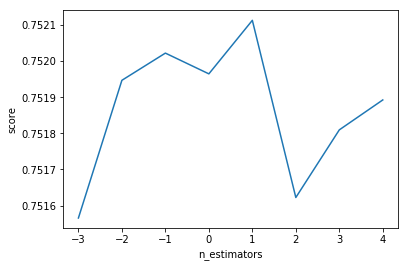

In [23]:
plt.plot([i for i in range(-3, 5)],np.mean(scores,axis = 1))
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()


При добавления "мешка слов" по героям качество заметно улучшается. Лучшее значение метрики AUC-ROC = 0.7519225672552419, при C = 10. Объясняется тем, что добавили новые фичи из категориальных признаков.

## Проверка финальной модели

In [31]:
df = pandas.read_csv('data/features.csv',index_col='match_id')
data=df.drop(['duration','radiant_win','tower_status_radiant','tower_status_dire',\
                  'barracks_status_radiant','barracks_status_dire'], axis=1)

data.fillna(0,inplace = True)

X_pick = np.zeros((data.shape[0], 112))

for i, match_id in enumerate(data.index):
    for p in range(5):
        X_pick[i, data.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1

data.drop([
    'lobby_type',
    'r1_hero',
    'r2_hero',
    'r3_hero',
    'r4_hero',
    'r5_hero',
    'd1_hero',
    'd2_hero',
    'd3_hero',
    'd4_hero',
    'd5_hero',
],axis = 1, inplace = True)
        
X_train = np.hstack((data.values, X_pick))
X_train = StandardScaler().fit_transform(X_train)

In [32]:
data = pandas.read_csv('data/features_test.csv',index_col='match_id')
data.fillna(0,inplace = True)


X_pick = np.zeros((data.shape[0], 112))

for i, match_id in enumerate(data.index):
    for p in range(5):
        X_pick[i, data.loc[match_id, 'r%d_hero' % (p+1)]-1] = 1
        X_pick[i, data.loc[match_id, 'd%d_hero' % (p+1)]-1] = -1
        
data.drop([
    'lobby_type',
    'r1_hero',
    'r2_hero',
    'r3_hero',
    'r4_hero',
    'r5_hero',
    'd1_hero',
    'd2_hero',
    'd3_hero',
    'd4_hero',
    'd5_hero',
],axis = 1, inplace = True)

X_test = np.hstack((data.values, X_pick))
X_test = StandardScaler().fit_transform(X_test)

In [33]:
model = LogisticRegression(C=0.01)
model.fit(X_train, y_train.values.ravel())

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [34]:
submit = model.predict_proba(X_test)

In [35]:
submit = [submit[i][1] for i in range(0,len(submit))]

In [36]:
print('Max proba: ' + str(max(submit)))
print('Min proba: ' + str(min(submit)))

Max proba: 0.9963287159254294
Min proba: 0.008705900769234444


In [37]:
pandas.DataFrame(data = submit, index = data.index, columns=['radiant_win']).to_csv('kaggle_submit.csv')